In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

import matplotlib as mpl

mpl.rcParams['axes.spines.left'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
# mpl.rcParams['axes.spines.bottom'] = False


# Forward and backward transfer

In [5]:
def get_forward_transfer(acc, b ):
    score = []
    N = len(acc)
    for i in range(1,N):
        aaa = acc[i-1][i] - b[i]
        # print(i, aaa , acc[i-1][i])
    avg_score = sum(score)/(N-1)
    return score , avg_score

def get_backward_transfer(acc):
    score = []
    N = len(acc)
    for i in range(0,N):
        aaa = acc[N-1][i] - acc[i][i]
        # print(i, aaa , acc[N-1][i] , acc[i][i])
        score.append(aaa)
    avg_score = sum(score)/(N-1)
    return score , avg_score

acc = [[0.569,0.05, 0 ],
        [0.40,0.64,0.07],
        [0.23,0.0,0.497]]

naive_acc = [[0.7127919135587313,0.0,0.0,0.0,0.0,0.0],
       [0.0,0.9716284492809949,0.0,0.0,0.0,0.0],
       [0.0,0.24446171783909834,0.9747292418772563,0.0,0.0,0.0],
        [0.0,0.0,0.4693140794223827,0.8364377182770664,0.0,0.0],
        [0.0,0.0,0.5324909747292419,0.3940628637951106,0.7243589743589743,0.0],
        [0.0,0.0,0.0,0.002328288707799767,0.0,0.625]]

In [6]:
import glob
df_list = glob.glob("/home/amrit/pipeline/in_progress/continual_learning/Deep-learning-project/final_logs/pathology/*.csv")

for df_path in df_list:
    df = pd.read_csv(df_path)
    df = df.drop(columns=["Unnamed: 0"]).fillna(0).to_numpy()
    print(df_path.split("/")[-1][8:-4] , "        BWT   : " , get_backward_transfer(df))
    # print("FWT" , get_forward_transfer(x, [0]*len(x)))
    print()

NISPA0_orig_Microscopic_CIL         BWT   :  ([-0.07158774373259058, -0.027185033615901744, 0.0], -0.04938638867424616)

DER_Microscopic_CIL         BWT   :  ([-0.22284122562674102, -0.30692779888921373, 0.0], -0.2648845122579774)

NAIVE_Microscopic_CIL         BWT   :  ([-0.8306406685236769, -0.9298450745396084, 0.0], -0.8802428715316426)

REMIND_Mircoscope_CIL         BWT   :  ([-0.058077991008758545, -0.022215723991394043, 0.0], -0.040146857500076294)

MAS_replay_Microscopic_CIL         BWT   :  ([0.011420612813370479, -0.06284712072493404, 0.0], -0.02571325395578178)

DERpp_Microscopic_CIL         BWT   :  ([-0.20320334261838435, -0.22478807366267173, 0.0], -0.21399570814052804)

JOINT_Microscopic_CIL         BWT   :  ([0.0], nan)

MAS_Microscopic_CIL         BWT   :  ([-0.7923398328690808, -0.8965214849459222, 0.0], -0.8444306589075015)



/tmp/ipykernel_610794/2113525420.py:17: RuntimeWarning: invalid value encountered in double_scalars
  avg_score = sum(score)/(N-1)


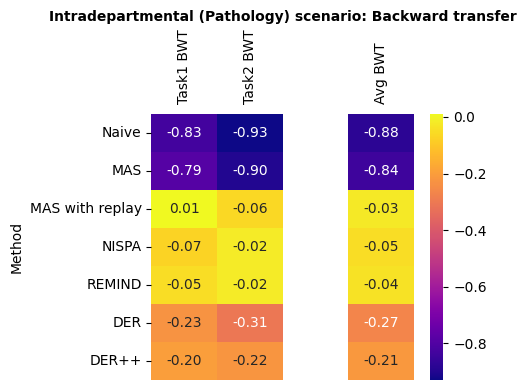

In [10]:
def get_plot(df, xticklabels, 
             plot_title= "Performance on Tasks",
             figsize=(15,6), 
             save_name = None):
    df.index =df['Method']
    df = df.drop(columns='Method')

    #https://stackoverflow.com/questions/37934242/hierarchical-axis-labeling-in-matplotlib-python
    fig1, ax1 = plt.subplots(1, figsize=figsize)
    sns.heatmap(df , xticklabels=xticklabels, fmt=".2f",
                ax=ax1, annot=True, cmap="plasma") #viridis")

    ax1.tick_params(axis='x', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True, rotation=90)
    ax1.set_title(plot_title, fontsize=10, fontweight="bold")
    # ax1.spines[['right', 'top', "bottom"]].set_visible(False)
    plt.tight_layout()
    if save_name!= None:
        fig1.savefig("./figures/" + save_name + '_bwt.pdf' , dpi=200)

    plt.show()
    
df = pd.read_csv("back_transfer_pathology.csv")
xticklabels=["Task1 BWT","Task2 BWT", "", "Avg BWT"]
get_plot(df, xticklabels, 
         plot_title= "Intradepartmental (Pathology) scenario: Backward transfer",
             figsize=(5, 4),
             save_name="pathology")

# Performance Plots

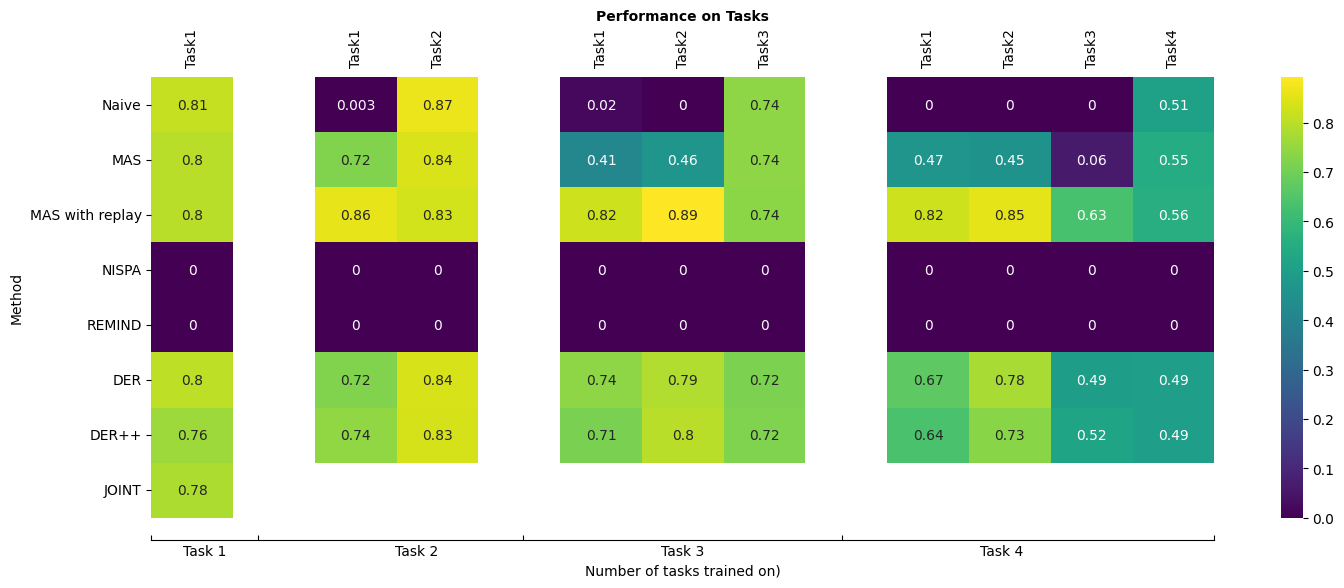

In [11]:


def get_tree_plot(df, xticklabels, task_names , task_name_location, task_tick_location, 
             plot_title= "Performance on Tasks",
             figsize=(15,6),
            save_name = None):
    df.index =df['Method']
    df = df.drop(columns='Method')

    #https://stackoverflow.com/questions/37934242/hierarchical-axis-labeling-in-matplotlib-python
    fig1, ax1 = plt.subplots(1, figsize=figsize)
    sns.heatmap(df , xticklabels=xticklabels,
                ax=ax1, annot=True, cmap="viridis")


    # Second X-axis
    ax2 = ax1.twiny()

    ax2.spines["bottom"].set_position(("axes", -0.05))
    ax2.tick_params('both', length=0, width=0, which='minor')
    ax2.tick_params('both', direction='in', which='major')
    ax2.xaxis.set_ticks_position("bottom")
    ax2.xaxis.set_label_position("bottom")

    ax2.set_xticks(task_tick_location)
    ax2.xaxis.set_major_formatter(ticker.NullFormatter())
    ax2.xaxis.set_minor_locator(ticker.FixedLocator(task_name_location))
    ax2.xaxis.set_minor_formatter(ticker.FixedFormatter(task_names))

    ax2.set_xlabel("Number of tasks trained on)", fontsize=10)

    ax1.tick_params(axis='x', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True, rotation=90)
    ax1.set_title(plot_title, fontsize=10, fontweight="bold")
    # ax1.spines[['right', 'top', "bottom"]].set_visible(False)

    plt.tight_layout()
    if save_name!= None:
        fig1.savefig("./figures/" + save_name + '_heatmap.pdf' , dpi=200)

    plt.show()

df = pd.read_csv("heatmap_interdepartmental.csv")
xticklabels=["Task1","" , "Task1","Task2","","Task1","Task2","Task3","","Task1","Task2","Task3","Task4"]
task_names = ['Task 1', 'Task 2', "Task 3", "Task 4"]
task_name_location = [0.05, 0.25, 0.5, 0.8]
task_tick_location = [0.0, 0.1, 0.35, 0.65, 1.0]
get_tree_plot(df, xticklabels, task_names, task_name_location , task_tick_location , save_name="interdepartmental_accuracy")

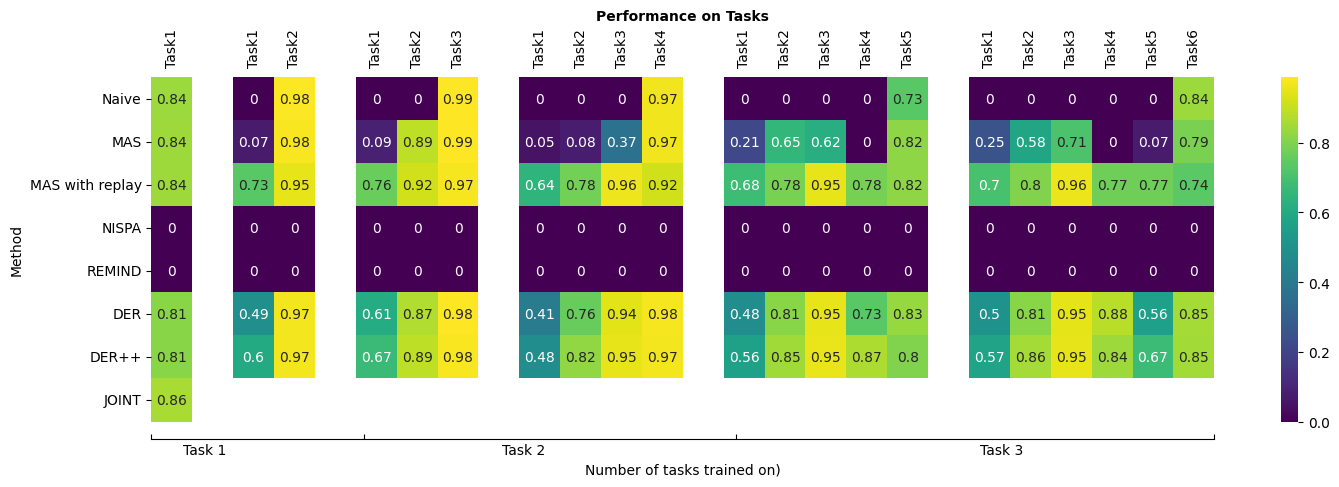

In [12]:
df = pd.read_csv("heatmap_radiology.csv")
xticklabels=["Task1","" , "Task1","Task2","","Task1","Task2","Task3",
             "","Task1","Task2","Task3","Task4","","Task1","Task2","Task3","Task4","Task5",
             "","Task1","Task2","Task3","Task4","Task5","Task6"]
task_names = ['Task 1', 'Task 2', "Task 3","Task4","Task5","Task6"]
task_name_location = [0.05, 0.35, 0.8]
task_tick_location = [0.0, 0.2, 0.55, 1.0]
get_tree_plot(df, xticklabels, task_names, task_name_location , task_tick_location , figsize=(15,5), save_name="radiology_accuracy")

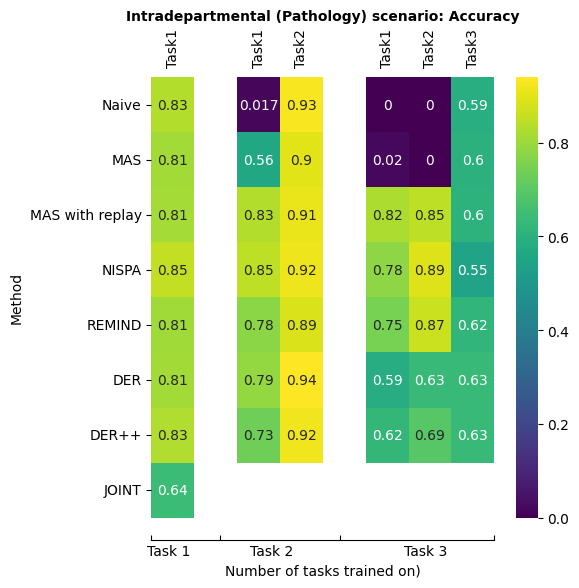

In [13]:
df = pd.read_csv("heatmap_pathology.csv")
xticklabels=["Task1","" , "Task1","Task2","","Task1","Task2","Task3"]
task_names = ['Task 1', 'Task 2', "Task 3"]
task_name_location = [0.05, 0.35, 0.8]
task_tick_location = [0.0, 0.2, 0.55, 1.0]
get_tree_plot(df, xticklabels, task_names, task_name_location , task_tick_location , 
         plot_title= "Intradepartmental (Pathology) scenario: Accuracy",
             figsize=(6,6), save_name="pathology_accuracy")

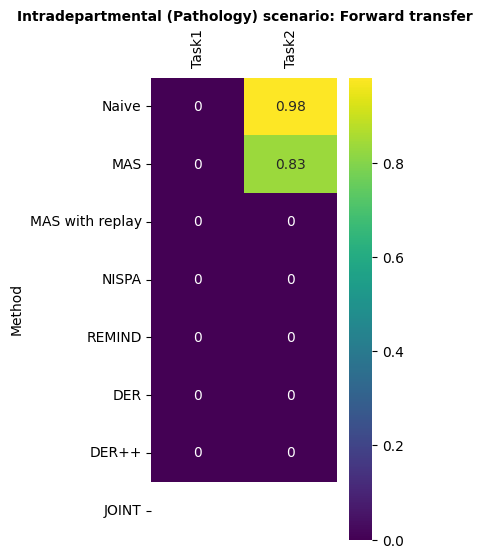

In [30]:
df = pd.read_csv("./final_logs/fw_transfer_pathology.csv")
xticklabels=["Task1","Task2"]
get_plot(df, xticklabels, task_names, task_name_location , task_tick_location , 
         plot_title= "Intradepartmental (Pathology) scenario: Forward transfer",
             figsize=(3, 6))

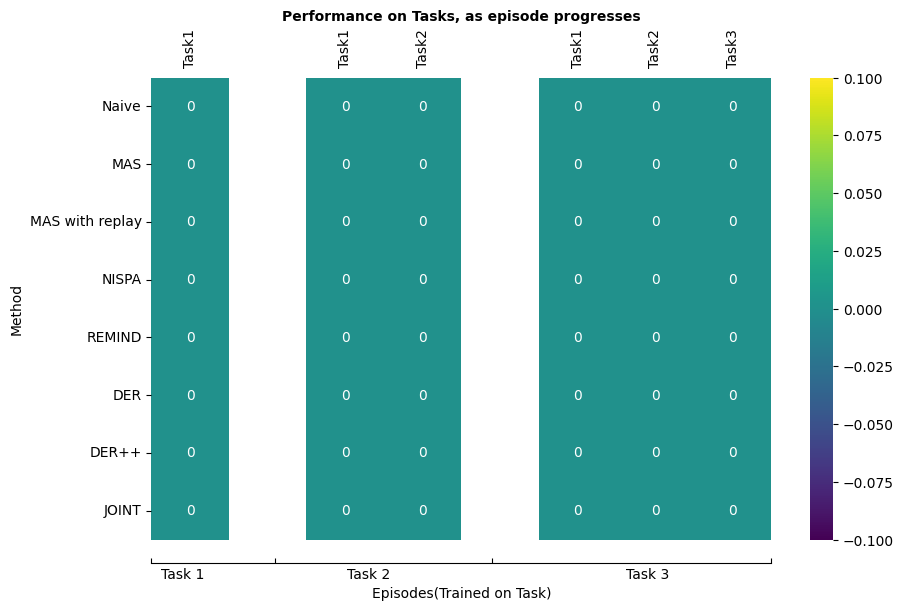

In [12]:
df = pd.read_csv("./final_logs/heatmap_interhospital.csv")
xticklabels=["Task1","" , "Task1","Task2","","Task1","Task2","Task3"]
task_names = ['Task 1', 'Task 2', "Task 3"]

task_name_location = [0.05, 0.35, 0.8]
task_tick_location = [0.0, 0.2, 0.55, 1.0]
get_tree_plot(df, xticklabels, task_names, task_name_location , task_tick_location , figsize=(10,6))

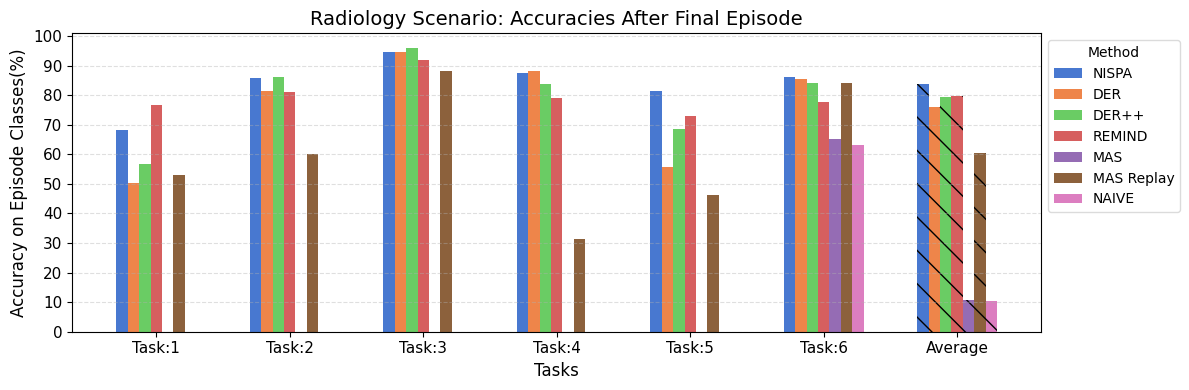

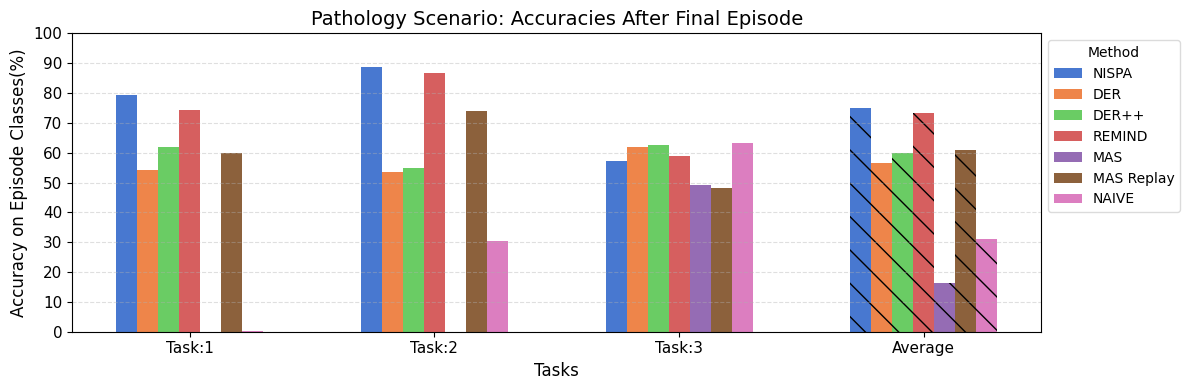

In [4]:


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

micro_data = {
    "NISPA": {
        'accuracy': [0.792618384 * 100,	0.887752119 * 100,	0.573625212 * 100, 75.13319051] # Last value is average
    },
    "DER": {
        'accuracy': [0.543593315 * 100,	0.53668518 * 100,	0.620156514 * 100, 56.68116696] # Last value is average
    },
    "DER++": {
        'accuracy': [0.619498607 * 100,	0.54866998 * 100,	0.627241963 * 100, 59.84701832] # Last value is average
    },
    "REMIND": {
        'accuracy': [0.743314743 * 100,	0.865828693 * 100,	0.589466989 * 100, 73.2870142] # Last value is average
    },
    "MAS": {
        'accuracy': [0,	0,	0.490186*100,	16.3395] # Last value is average
    },
    "MAS Replay": {
        'accuracy': [0.600139 *100, 	0.740719 *100,	0.482339 *100,	60.7732333] # Last value is average
    },
    "NAIVE": {
        'accuracy': [0.001392757660167131 * 100, 0.3025431160479392 * 100, 0.6320431472081218 * 100, 31.0256305] # Last value is average
    },
}


radio_data = {
    "NISPA": {
        'accuracy': [0.681770652 * 100,	0.858919549 * 100,	0.946750903 * 100,	0.873690338 * 100,
                     0.814102564  * 100,	0.860576923  * 100, 83.93018214] # Last value is average
    },
    "DER": {
        'accuracy': [0.504356919 * 100,	0.813835989 * 100,	0.94765343 * 100,
                     0.88242142  * 100,	0.557692308  * 100,	0.854166667  * 100,	76.0021122] # Last value is average
    },
    "DER++": {
        'accuracy': [0.567096549 * 100,	0.862806063 * 100,	0.961191336 * 100,
                     0.83701979 * 100,	0.685897436 * 100,	0.841346154 * 100, 79.25595547] # Last value is average
    },
    "REMIND": {
        'accuracy': [0.766469181 * 100,	0.809560835* 100,	0.918772578 * 100,	0.791036069 * 100,
                     0.730769217 * 100,	0.777243614* 100, 79.8975249] # Last value is average
    },
    "MAS": {
        'accuracy': [0,	0,	0,	0,	0,	0.652244 *100,	10.8707333] # Last value is average
    },
    "MAS Replay": {
        'accuracy': [0.529104 * 100,	0.601244 * 100,	0.881769 * 100,	0.314901 * 100,	0.461538 * 100,	0.839744 * 100,	60.4716667] # Last value is average
    },
    "NAIVE": {
        'accuracy': [0.0, 0.0, 0.0, 0.0, 0.0, 0.6314102564102564*100, 10.52] # Last value is average
    },

}


for values in [ [radio_data,"Radiology Scenario" ]  , 
               [ micro_data , "Pathology Scenario"]]:
  data = values[0]
  dataset_name = values[1]

  #data = micro_data
  #dataset_name = "Microscopic"

  # data = radiological_data
  # dataset_name = "Radiological"

  import numpy as np
  import matplotlib.pyplot as plt
  import seaborn as sns

  # Define the data

  # Set the figure size and style
#   sns.set_style("ticks")
  fig, ax = plt.subplots(figsize=(12, 4))

  # Set the colors
  colors = sns.color_palette("muted", len(data.keys()))

  # Create the x-axis labels
  x_labels = ["Task:{}".format(i) for i in range(1, data['NISPA']['accuracy'].__len__() )] + ["Average"]

  # Calculate the number of methods and the width of each bar
  num_methods = len(data.keys())
  bar_width = 0.6 / num_methods
  error_bar_config = {'elinewidth': 0.5}
  # Plot the bars
  for i, (key, values) in enumerate(data.items()):
      accuracies = np.array(values['accuracy'])
      x_pos = np.arange(len(accuracies)) + (i - (num_methods - 1) / 2) * bar_width

      for j, (acc, sigma, x) in enumerate(zip(accuracies, accuracies, x_pos)):
          # Add hatch marks to the last bars at x_tick "Task 6"
          if j == len(accuracies) - 1:
              hatch_style = '\\'
          else:
              hatch_style = ''
          ax.bar(x, acc, width=bar_width, color=colors[i], label=key if j == 0 else "", hatch=hatch_style,
                  error_kw=error_bar_config)

  # Add some text for labels, title and axes ticks
  ax.set_ylabel('Accuracy on Episode Classes(%)', fontsize=12)
  ax.set_xlabel('Tasks', fontsize=12)
  ax.set_title('{}: Accuracies After Final Episode'.format(dataset_name), fontsize=14)
  ax.set_xticks(np.arange(len(x_labels)))
  ax.set_xticklabels(x_labels, fontsize=11, ha='center')
  ax.set_yticks(np.arange(0, 101, 10))
  ax.set_yticklabels(np.arange(0, 101, 10), fontsize=11)

  # Add gridlines
  ax.grid(axis='y', linestyle='--', alpha=0.4)

  # Add legend
  ax.legend(fontsize=11)
  legend = ax.legend(title="Method", title_fontsize=10, fontsize=10, framealpha=0.7, bbox_to_anchor=(1, 1))
  legend.get_title().set_fontsize('10')

  # Set the axis tick and label styles
#   sns.despine()
  ax.tick_params(axis='both', which='major', labelsize=11)

  # Save the plot
  fig.tight_layout()
  fig.savefig('./figures/barplot_{}.pdf'.format(dataset_name), dpi=300)


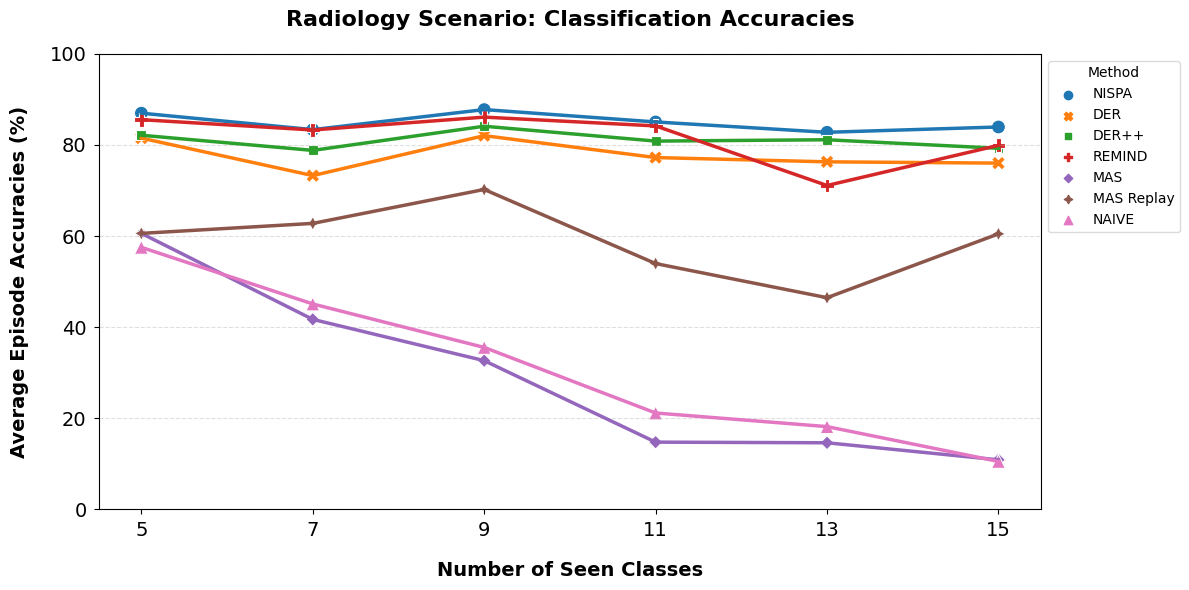

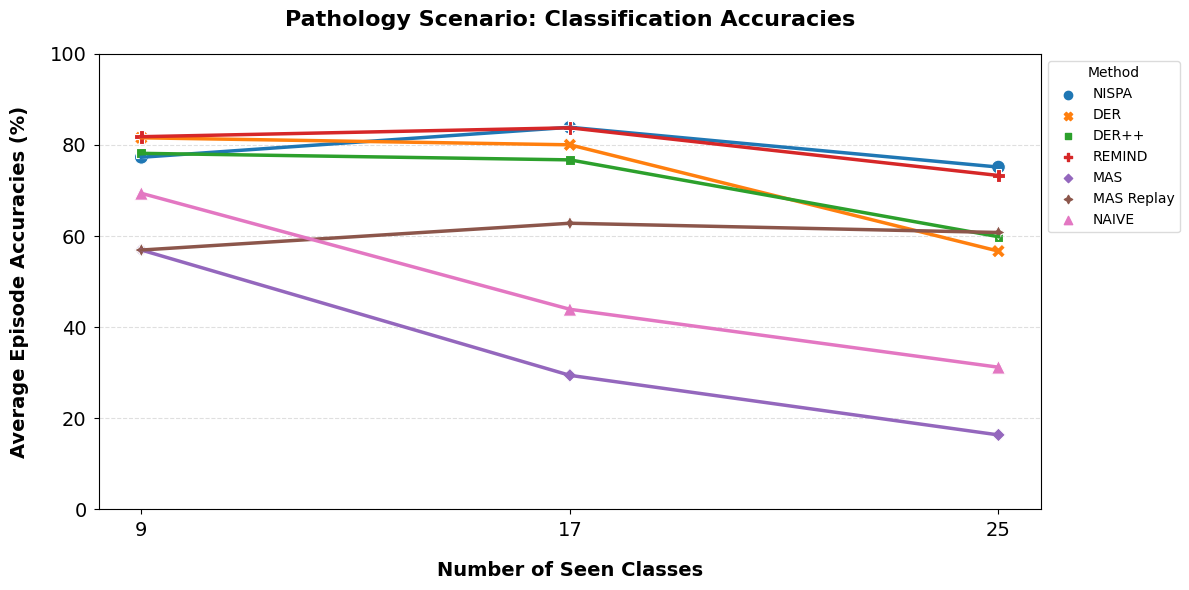

In [6]:
micro_data = {
    'NISPA': {
      9:77.28412256,  17: 83.8674694,  25: 75.13319051},
    'DER': {
        9: 81.55988858, 17: 80.01774636, 25: 56.68116696
    },
    'DER++': {
        9: 78.14763231, 17: 76.71388784, 25: 59.84701832
    },
    'REMIND': {
        9: 81.796658,  17: 83.7518573,  25: 73.2870142
    },
    'MAS': {
        9: 56.922,  17: 29.4167,  25: 16.3395
    },
    'MAS Replay': {
        9: 56.922,  17: 62.8049,  25: 60.7732333
    },
    'NAIVE': {
        9: 69.37325905,  17: 43.91459354,  25: 31.1993007
    },
    # 'JOINT': {
    #     9: 62.23,  17: 62.23,  25: 62.23
    # },
}


radio_data = {
    'NISPA': {
      5:86.96409899, 7:83.35071811, 9:87.74977297,  11: 85.03498505,  13: 82.76408431,  15:83.93018214},
    'DER': {
      5: 81.49180899, 7: 73.25901047, 9: 82.03139742,  11: 77.21767984,  13: 76.28316728,  15: 76.0021122
    },
    'DER++': {
      5: 82.1192053, 7: 78.79376375, 9: 84.09563615,  11: 80.83555473,  13: 81.1270157,  15: 79.25595547
    },
    'REMIND': {
       5: 85.5350316, 7: 83.2745314, 9: 86.0962808,  11: 84.167558,  13: 71.0851955,   15: 79.8975249
    },
    'MAS': {
       5: 60.5786, 7: 41.7003, 9: 32.6414,  11: 14.755525,  13: 14.61538,   15: 10.8707333
    },
    'MAS Replay': {
       5: 60.5786, 7: 62.76835, 9: 70.2154333,  11: 53.952575,  13: 46.46278,   15: 60.4716667
    },
    'NAIVE': {
        5: 57.51132799, 7: 45.08356005, 9: 35.5428936,  11: 21.15488268,  13: 18.16379747,   15: 10.52350427
    },
    # 'JOINT': {
    #     5: 68.10, 7: 68.10, 9: 68.10,  11: 68.10,  13:68.10,   15: 68.10
    # },

}


for values in [ [radio_data,"Radiology Scenario" ]  , 
               [ micro_data , "Pathology Scenario"]]:
  data = values[0]
  dataset_name = values[1]
  # data = micro_data
  # dataset_name = "Microscopic Scenario"

  import matplotlib.pyplot as plt
  import seaborn as sns
  import pandas as pd

  # Convert the dictionary to a pandas DataFrame
  df = pd.DataFrame.from_dict(data)

  # Set the style of the plot
  # sns.set_style("whitegrid")

  # Plot the line plot
  fig, ax = plt.subplots(figsize=(12, 6), label='Line plot')
  line_plot = sns.lineplot(data=df, dashes=False, linewidth=2.5, ax=ax, legend=False)
  sns.scatterplot(data=df, marker='o', s=100)

  # Set the title and axis labels
  ax.set_title("{}: Classification Accuracies".format(dataset_name), fontsize=16, fontweight="bold", pad=20)
  ax.set_xlabel("Number of Seen Classes", fontsize=14, fontweight="bold", labelpad=15)
  ax.set_ylabel("Average Episode Accuracies (%)", fontsize=14, fontweight="bold", labelpad=15)

  # Set the tick label size and rotation
  ax.tick_params(axis="both", labelsize=14, pad=5)
  plt.xticks(list(data["NISPA"].keys()))
  plt.ylim(0, 100)
  # Set the legend
  legend = ax.legend(title="Method", title_fontsize=10, fontsize=10, framealpha=0.7, bbox_to_anchor=(1, 1))
  legend.get_title().set_fontsize('10')
  

  # Add gridlines
  ax.grid(axis='y', linestyle='--', alpha=0.4)

  # Set the gridlines
#   ax.grid(True, which='major', color='gray', linestyle='--', linewidth=1, alpha=0.5)

  # Remove the top and right spines
#   sns.despine()

  # Save the plot
  plt.tight_layout()
  plt.savefig("./figures/lineplot_{}.pdf".format(dataset_name), dpi=300)

